# Bài thực hành 1

## Vấn đề 
_Dự đoán khả năng tiến triển của bệnh tiểu đường thông qua các chỉ số sinh lý của cơ thể._


## Thông tin dữ liệu:

- Số lượng mẫu: 442 (thông tin từ 442 bệnh nhân)
- Số lượng thuộc tính:
    Thông tin các thuộc tính (10 cột giá trị đầu tiên): Age(tuổi), Sex (giới tính), 
    Body mass index (chỉ số khối cơ thể), Average blood pressure(huyết ap trung bình), S1, S2, S3, S4, S5, S6 (sáu phép đo huyết thanh khác).
- Mục tiêu:	Cột 11, chỉ số đánh giá mức độ tiến triển của bệnh 1 năm sau khi điều trị. 

**! Chú ý: Dữ liệu thông tin thuộc tính đã được chuẩn hoá**

Xem thêm thông tin về nguồn dữ liệu tại: (https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)


# Hướng giải quyết

Giả sử rằng khả năng tiến triển của bệnh tiểu đường (ký hiệu: `y`) là đại lượng phụ thuộc tuyến tính vào các thông tin sinh lý của bệnh nhân như các thuộc tính đã mô tả ở trên (tuổi, giới tính, chỉ số khối, ... - ký hiệu: `x1, x2, .. x_n`) : 

`y = w0 + w1*x1 + w2*x2 + ... + w_n*x_n`

Mục tiêu: Tìm được bộ trọng số `[w0, w1, ... w_n]` biểu diễn mối quan hệ này. 

# Thư viện sử dụng 

- matplotlib: phục vụ vẽ các đồ thị 
- numpy: tính toán các phép biến đổi trên ma trận / vector 
- math: thực hiện một số hàm tính toán 
- pandas: phục vụ chuyển đổi trên dữ liệu dạng bảng 
- scikit-learn: (sklearn) thư viện hỗ trợ xây dựng các mô hình học máy, các hàm training và testing. 


In [3]:
!pip install pandas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import math 

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Đọc dữ liệu 

Dữ liệu về bệnh tiểu đường được hỗ trợ bởi sklearn, đọc dữ liệu thông qua hàm `datasets.load_diabetes()` 

Xem thêm các bộ dữ liệu khác tại https://scikit-learn.org/stable/datasets/index.html#toy-datasets.
https://scikit-learn.org/stable/datasets/toy_dataset.html

Dữ liệu nhận về ở dạng object với các thành phần thuộc tính:

- data: ma trận 2 chiều (442x10) - các thông tin bệnh nhân được chuẩn hoá về dạng số thực. 
- target: mảng các số thực (442,) - chỉ số tiến triển của bệnh tiểu đường. 

In [6]:
# lay du lieu diabetes - du lieu ve benh tieu duong
diabetes = datasets.load_diabetes()
print("Số chiều dữ liệu input: ", diabetes.data.shape)
print("Kiểu dữ liệu input: ", type(diabetes.data))
print("Số chiều dữ liệu target: ", diabetes.target.shape)
print("Kiểu dữ liệu target: ", type(diabetes.target))
print()

print("5 mẫu dữ liệu đầu tiên:")
print("input: ", diabetes.data[:5])
print("target: ",diabetes.target[:5])
print("data[5,1]: ", diabetes.data[5,1])

Số chiều dữ liệu input:  (442, 10)
Kiểu dữ liệu input:  <class 'numpy.ndarray'>
Số chiều dữ liệu target:  (442,)
Kiểu dữ liệu target:  <class 'numpy.ndarray'>

5 mẫu dữ liệu đầu tiên:
input:  [[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]
target:  [151.  75. 141. 206. 135.]
data[5,1]:  -0.044641636506989144


**Chia dữ liệu làm 2 phần training 362 mẫu và testing 80 mẫu** 

In [7]:
# cat nho du lieu, lay 1 phan cho qua trinh thu nghiem,
# chia train test cac mau du lieu
# diabetes_X = diabetes.data[:, np.newaxis, 2]
diabetes_X = diabetes.data

diabetes_X_train = diabetes_X[:361]
diabetes_y_train = diabetes.target[:361]

diabetes_X_test = diabetes_X[362:]
diabetes_y_test = diabetes.target[362:]

# Xây dựng mô hình Regression sử dụng Sklearn

Thử nghiệm xây dựng mô hình hồi quy (Linear Regression / Ridge Regression) để học được bộ tham số

- [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) `linear_model.LinearRegression()`
- [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) `linear_model.Ridge()`

In [8]:
# Xay dung model su dung sklearn
regr = linear_model.LinearRegression()



In [9]:
##### exercise #####
# Yêu cầu: Cài đặt mô hình Ridge Regression với alpha = 0.1
# Gợi ý: xem hướng dẫn tại https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
######################
ridge = linear_model.Ridge(alpha=0.1)

# Training mô hình

Sử dụng Dữ liệu đã được chia ở bước trước đó để thực hiện training model. 

=> Tìm được bộ trọng số `[w0, w1, ... w_n]`

In [10]:
# Huấn luyện mô hình Linear Regression
regr.fit(diabetes_X_train, diabetes_y_train)
print("[w1, ... w_n] = ", regr.coef_)
print("w0 = ", regr.intercept_)

[w1, ... w_n] =  [-1.12982324e-02 -2.49782541e+02  5.18802202e+02  2.97220454e+02
 -6.39802236e+02  3.56330510e+02  2.77834385e+01  1.46962789e+02
  6.90474996e+02  1.05716702e+02]
w0 =  152.56041961097782


In [11]:
##### exercise #####
# Yêu cầu: Huấn luyện mô hình Ridge Regression và in ra các trọng số w0, w1, ...,wn của mô hình
# Gợi ý: xem hướng dẫn tại https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
######################
ridge.fit(diabetes_X_train, diabetes_y_train)
print("[w1, ... w_n] = ", ridge.coef_)
print("w0 = ", ridge.intercept_)


[w1, ... w_n] =  [  10.51523842 -215.21946642  477.04576811  275.18547584  -64.84522547
  -82.84458659 -194.22465786  112.99561167  427.19001456  121.18397114]
w0 =  152.57401415344637


In [13]:
##### exercise #####
# Yêu cầu: tính giá trị dự đoán của mô hình trên mẫu đầu tiên của tập test và so sánh với kết quả của thư viện
# Gợi ý: sử dụng công thức y = w0 + w1*x1 + w1*x2 + ... + w_n*x_n
######################
#Dự đoán thử cho trường hợp đầu tiên

#Giá trị đúng
print("Gia tri true: ", diabetes_y_test[0])

#Dự đoán cho mô hình Linear Regression sử dụng hàm dự đoán của thư viện
y_pred_linear = regr.predict(diabetes_X_test[0:1])     
print("Gia tri du doan cho mô hình linear regression: ", y_pred_linear)

#Viết code tính và in kết quả dự đoán cho mô hình Linear Regression sử dụng công thức tại đây
y_pred_linear_0 = sum(regr.coef_ * diabetes_X_test[0]) + regr.intercept_
print("Gia tri du doan cho mo hinh linear regression theo cong thuc: ", y_pred_linear_0)

#Dự đoán cho mô hình Ridge Regression sử dụng hàm dự đoán của thư viện
y_pred_ridge = ridge.predict(diabetes_X_test[0:1])  
print("Gia tri du doan cho mô hình ridge regression: ", y_pred_ridge)

#Viết code tính và in kết quả dự đoán cho mô hình Ridge Regression sử dụng công thức tại đây
y_pred_ridge_0 = sum(ridge.coef_ * diabetes_X_test[0]) + ridge.intercept_
print("Gia tri du doan cho mo hinh ridge regression theo cong thuc: ", y_pred_ridge_0)

######################

Gia tri true:  321.0
Gia tri du doan cho mô hình linear regression:  [234.35947872]
Gia tri du doan cho mo hinh linear regression theo cong thuc:  234.35947872322683
Gia tri du doan cho mô hình ridge regression:  [226.73474004]
Gia tri du doan cho mo hinh ridge regression theo cong thuc:  226.734740040557


# Dự đoán các mẫu dữ liệu trong tập test 

In [ ]:
# Thực hiện suy diễn sau khi huấn luyện
diabetes_y_pred = regr.predict(diabetes_X_test)
pd.DataFrame(data=np.array([diabetes_y_test, diabetes_y_pred,
                            abs(diabetes_y_test - diabetes_y_pred)]).T,
             columns=["Thực tế", "Dự đoán", "Lệch"])  

# pd.DataFrame(data=np.array([diabetes_y_test, diabetes_y_pred,
#                             abs(diabetes_y_test - diabetes_y_pred)]), 
#              index=["Thực tế", "Dự đoán", "Lệch"])  

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
Thực tế,321.000000,58.000000,262.000000,206.000000,233.000000,242.000000,123.000000,167.000000,63.000000,197.000000,...,173.000000,72.000000,49.000000,64.000000,48.000000,178.000000,104.000000,132.000000,220.000000,57.000000
Dự đoán,234.359479,163.999748,163.520115,167.189446,254.806697,256.701957,200.103626,186.633577,59.162017,195.604091,...,222.818482,62.106706,134.359916,120.484923,53.666924,191.710701,104.626354,122.693494,210.454911,54.392009
Lệch,86.640521,105.999748,98.479885,38.810554,21.806697,14.701957,77.103626,19.633577,3.837983,1.395909,...,49.818482,9.893294,85.359916,56.484923,5.666924,13.710701,0.626354,9.306506,9.545089,2.607991


# Đánh giá 

Sử dụng độ đo RMSE tính căn bậc 2 của trung bình bình phương lỗi. 
> $\text{RMSE}(y, \hat{y}) = \sqrt{\frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2}.$

- Lỗi càng nhỏ càng thể hiện mô hình có khả năng học và dự đoán hiệu quả 
- Như thế nào là nhỏ ? 

In [10]:
# Giá trị RMSE của mô hình Linear Regression
math.sqrt(mean_squared_error(diabetes_y_test, diabetes_y_pred))

51.539230657101335

In [19]:
##### exercise #####
# Yêu cầu: đánh giá độ đo RMSE của mô hình Ridge Regression với các hằng số phạt khác nhau, in ra kết quả.
# Gợi ý: Các bước làm:
# - Lặp theo danh sách các hằng số phạt
# - Dựng các mô hình Ridge Regression với mỗi hằng số phạt tương ứng
# - Huấn luyện các mô hình và dự đoán 
# - Tính RMSE tương ứng
######################

#Các giá trị hằng số phạt cho trước
_lambda = [0, 0.0001,0.01, 0.04, 0.05, 0.06, 0.1, 0.5, 1, 5, 10, 20]
for a in _lambda:
    rmodel = linear_model.Ridge(alpha = a)
    rmodel.fit(diabetes_X_train, diabetes_y_train)
    y_pred = rmodel.predict(diabetes_X_test)
    rmse = math.sqrt(mean_squared_error(diabetes_y_test, y_pred))
    print("Lamda: " + str(a) + ", rmse: " + str(rmse))

Lamda: 0, rmse: 51.53921127468047
Lamda: 0.0001, rmse: 51.54635240923985
Lamda: 0.01, rmse: 51.888660697856125
Lamda: 0.04, rmse: 52.11211596712348
Lamda: 0.05, rmse: 52.15254636221311
Lamda: 0.06, rmse: 52.19077570036307
Lamda: 0.1, rmse: 52.347597926523825
Lamda: 0.5, rmse: 54.613321511474574
Lamda: 1, rmse: 57.382574887617025
Lamda: 5, rmse: 67.24133680169886
Lamda: 10, rmse: 71.18738262709283
Lamda: 20, rmse: 74.05735936735675


In [16]:
!pip install seaborn

## Vẽ biểu đồ phân phối cho chỉ số thực tế

C:\Users\Admin\AppData\Local\Temp\ipykernel_49272\2026487888.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_y_test)


,values
count,80.00000
mean,152.38750
std,78.46994
min,40.00000
25%,72.00000
50%,140.00000
75%,217.50000
max,321.00000


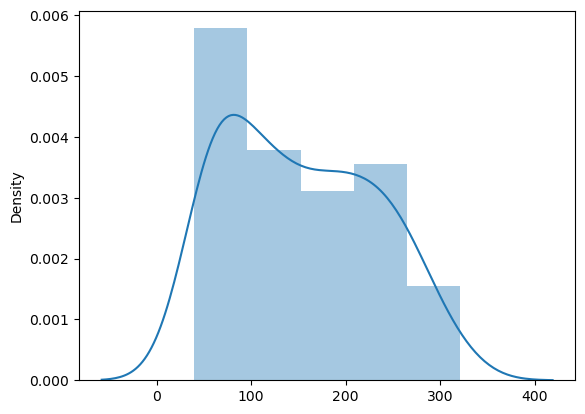

In [20]:
import seaborn as sns
sns.distplot(diabetes_y_test)
pd.DataFrame(data=diabetes_y_test, columns=["values"]).describe()

## Vẽ biểu đồ phân phối cho chỉ số dự đoán của mô hình linear regression

C:\Users\Admin\AppData\Local\Temp\ipykernel_49272\2909278806.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_y_pred)


,values
count,80.000000
mean,155.501049
std,57.511599
min,49.193721
25%,112.399159
50%,161.143223
75%,191.047878
max,279.598577


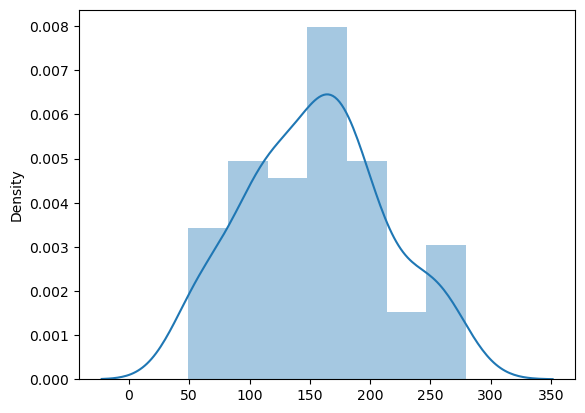

In [21]:
##### exercise #####
# Yêu cầu: Tính các chỉ số thống kê và vẽ biểu đồ phân phối của chỉ số dự đoán bằng mô hình Linear Regression, quan sát và nhận xét
# Gợi ý: sử dụng sns và pd
######################
sns.distplot(diabetes_y_pred)
pd.DataFrame(data=diabetes_y_pred, columns=["values"]).describe()


## Vẽ biểu đồ so sánh kết quả dự đoán và thực tế

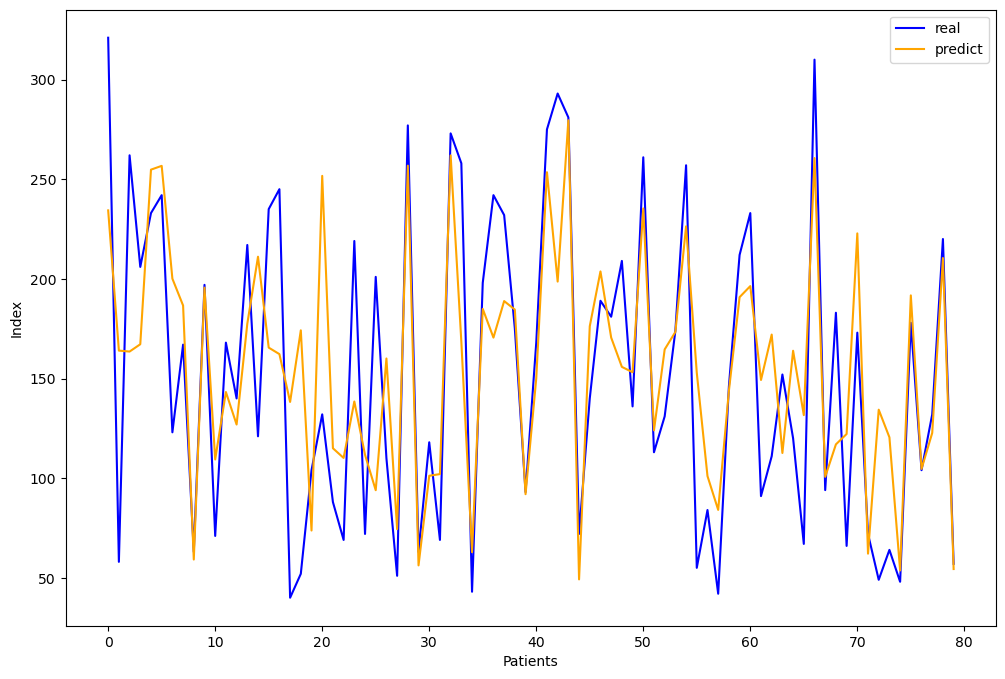

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
 
plt.plot(diabetes_y_test, color = 'blue', label='real')
plt.plot(diabetes_y_pred, color = 'orange', label='predict')
 
plt.xlabel('Patients')

plt.ylabel('Index')

plt.legend()
 
# function to show the plot
plt.show()